In [322]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Task 1:


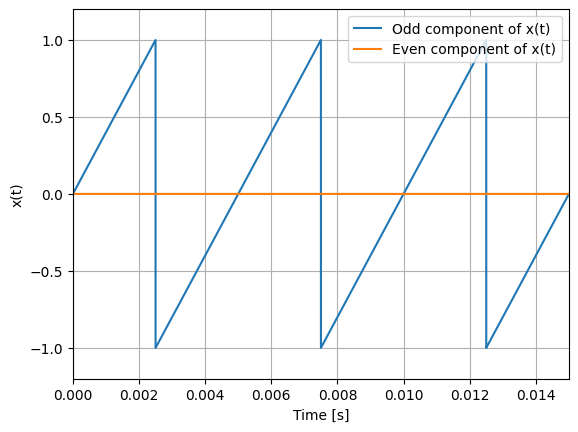

In [323]:
start = 0             # Start value
stop = 15*10**(-3)    # Stop value
increment = 0.000001  # Increment value (TODO: we might want to make this even smaller?)

t = np.arange(start, stop, increment)

x_odd = signal.sawtooth(2*np.pi * 200 * (t-2.5*10**(-3)))

x_even = (x_odd - x_odd)/2

# Create a new figure
fig, ax = plt.subplots()

# Plot the curve with x-values 't' and y-values 'x' into the figure 'ax' with the legend entry 'My Signal'
ax.plot(t, x_odd, label='Odd component of x(t)')
ax.plot(t, x_even, label='Even component of x(t)')


ax.set_ylabel('x(t)')  # Add y-axis label
ax.set_xlabel("Time [s]") # Add x-axis label
ax.grid(True)              # Turn on the grid
ax.set_xlim(0, 0.015)       # Set x-axis limits 0-15 ms
ax.set_ylim(-1.2, 1.2)     # Set y-axis limits
ax.legend(loc='upper right') # Add legend
plt.show()                 # Show the plot

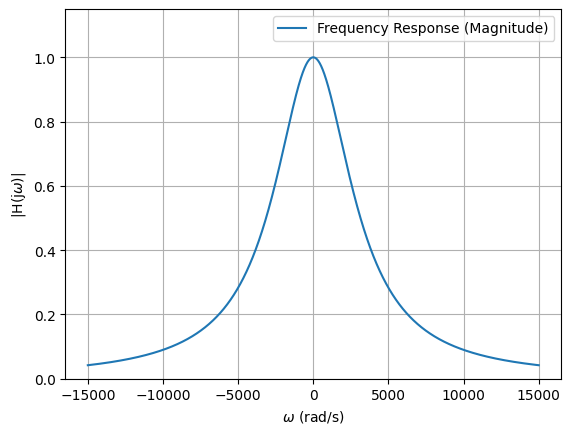

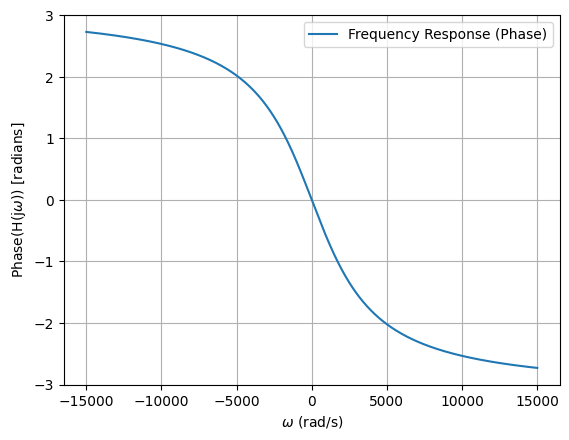

In [324]:
alpha = 1000 * np.pi
omega = np.linspace(-15e3, 15e3, 30001)  # Dense grid of frequencies

H = (alpha**2) / ((alpha + 1j*omega)**2)

# Plot the magnitude response
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()

ax1.plot(omega, np.abs(H), label='Frequency Response (Magnitude)')
ax1.set_xlabel('$\omega$ (rad/s)')
ax1.set_ylabel('|H(j$\omega$)|')
ax1.set_ylim(0, 1.15)     # Set y-axis limits
ax1.legend(loc='upper right')       # Add legend
ax1.grid(True)                      # Turn on the grid

# Plot the phase response
ax2.plot(omega, np.angle(H), label='Frequency Response (Phase)')
ax2.set_xlabel('$\omega$ (rad/s)')
ax2.set_ylabel('Phase(H(j$\omega$)) [radians]')
ax2.legend(loc='upper right')       # Add legend
ax2.grid(True)                      # Turn on the grid

plt.show()

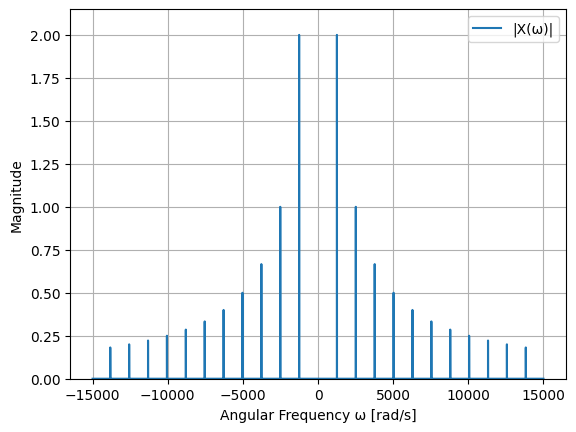

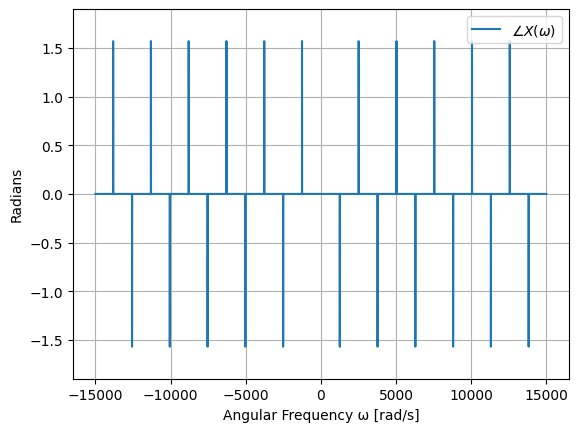

In [325]:
X_omega = np.zeros(len(omega), dtype = complex)
#n = 11 #15000/400pi = ca 11
omega_0 = 2*np.pi*200 #Since the frequency is 200 Hz


for n in range(-11, 12):
    if n != 0:
        Cn = (1j / (n * np.pi)) * (-1)**n
        # Find the index corresponding to n * omega_0 in the omega array
        index = np.abs(omega - n * omega_0).argmin()
        X_omega[index] = 2 * np.pi * Cn


# Plot the magnitude response
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()

ax1.plot(omega, np.abs(X_omega), label='|X(ω)|')
ax1.set_xlabel('Angular Frequency ω [rad/s]')
ax1.set_ylabel('Magnitude')
ax1.set_ylim(0, 2.15)     # Set y-axis limits
ax1.legend(loc='upper right')       # Add legend
ax1.grid(True)                      # Turn on the grid

# Plot the phase response
ax2.plot(omega, np.angle(X_omega), label=r"$\angle X(ω)$")
ax2.set_xlabel('Angular Frequency ω [rad/s]')
ax2.set_ylabel('Radians')
ax2.set_ylim(-1.9, 1.9)     # Set y-axis limits
ax2.legend(loc='upper right')       # Add legend
ax2.grid(True)                      # Turn on the grid

plt.show()

## Task 2c)

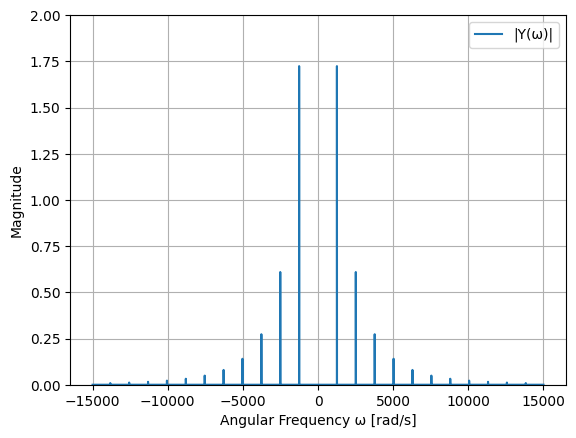

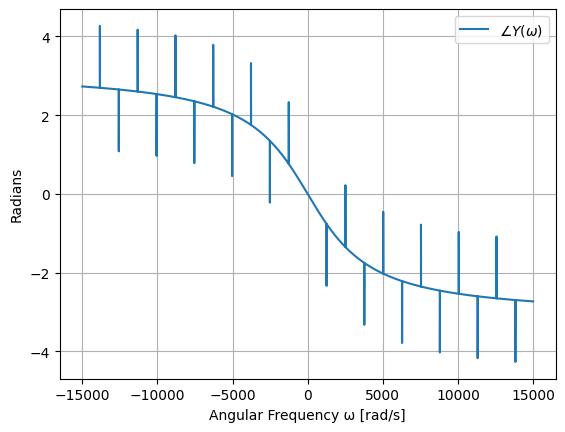

In [326]:
# Plot the magnitude response
Y_mag = np.abs(X_omega) * np.abs(H)
Y_angle = np.angle(X_omega) + np.angle(H)

fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()

ax1.plot(omega, Y_mag, label='|Y(ω)|')
ax1.set_xlabel('Angular Frequency ω [rad/s]')
ax1.set_ylabel('Magnitude')
ax1.set_ylim(0, 2)     # Set y-axis limits
ax1.legend(loc='upper right')       # Add legend
ax1.grid(True)                      # Turn on the grid

# Plot the phase response
ax2.plot(omega, Y_angle, label=r"$\angle Y(ω)$")
ax2.set_xlabel('Angular Frequency ω [rad/s]')
ax2.set_ylabel("Radians")
ax2.legend(loc='upper right')       # Add legend
ax2.grid(True)                      # Turn on the grid

plt.show()

## 2d)

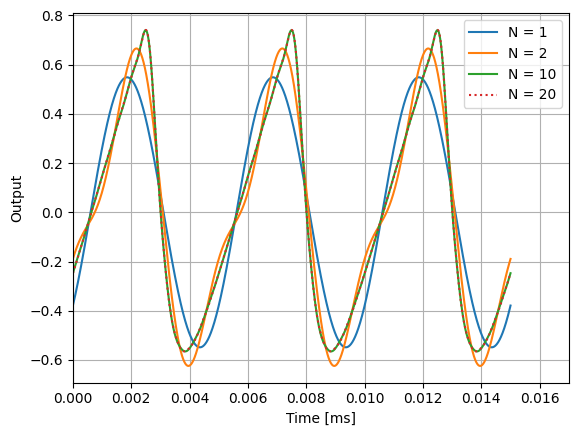

In [327]:
#Use the results from 2c

N = [1, 2, 10, 20]

Y_omega = X_omega * H
y_signals = []

def Y(omega, Y_omega, n, omega_0):
    # Find the index corresponding to n_omega_0 in the omega array
    index = np.abs(omega - n * omega_0).argmin()
    return Y_omega[index]

for i in N:
    y = np.zeros(len(t), dtype = complex)

    for n in range(-i,i+1):
        y += Y(omega, Y_omega, n, omega_0) * np.exp(1j * n * omega_0 * t)

        # remove residual imaginary parts
    for value in y:
        if np.abs(value.imag) < 1e-15: 
            #print(f"Small residual imaginary part {value.imag}")
            value = np.real(value)

    y_signals.append((1/(2*np.pi))*y)

fig, ax = plt.subplots()

ax.plot(t, y_signals[0], label='N = 1')
ax.plot(t, y_signals[1], label='N = 2')
ax.plot(t, y_signals[2], label='N = 10')
ax.plot(t, y_signals[3], label='N = 20', linestyle = "dotted")

ax.set_xlabel('Time [ms]')
ax.set_ylabel('Output')
ax.set_xlim(0, 0.017)
ax.legend(loc='upper right')       # Add legend
ax.grid(True)  

plt.show()
